In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from libs.utils import get_group_figure
from libs.utils import get_dict_group_ID

plt.rc('font', family='calibri')

In [2]:
df = pd.read_csv('./data/dataset_filtered.csv')
df_id = pd.read_excel('./data/example_metabolite_ID.xlsx', sheet_name='ID')

In [3]:
# Prepare a dataset with feature intensities
df.head()

,Name,Label,0.5_201.8884,0.5_230.8912,0.51_170.9287,0.51_182.9633,0.51_214.9182,0.51_344.8764,0.52_125.9871,0.52_140.918,...,10.26_617.4752,10.33_617.4756,10.34_393.2981,10.4_756.5543,10.41_617.4755,10.41_618.4799,10.41_796.5461,10.41_804.5518,10.42_350.2677,10.44_401.342
0,A28,Control,1079.5972,3364.987,8013.412,13777.28,345581.7,13184.68,3529.62868,1550.3430,...,4078.967,0.0000,0.000000,0.0,573.2535,0.0000,0.000000,11.078637,247.644689,0.0
1,A29,Control,1047.1632,2062.431,7226.280,17603.75,343324.0,12054.90,3266.07968,1093.4700,...,7574.451,513.8083,0.000000,0.0,1104.6180,126.5826,795.170393,16679.565437,410.276589,0.0
2,A30,Control,978.7220,1033.370,8414.276,17165.03,367166.3,14203.08,3107.84768,1569.9530,...,12570.470,1549.3030,213.668596,0.0,870.0868,0.0000,0.000000,36191.855437,0.000000,0.0
3,A31,Control,0.0000,2167.344,7668.042,11622.75,312270.2,12306.71,2370.03668,900.8315,...,1649.763,904.4012,0.000000,0.0,523.0399,0.0000,0.000000,1597.835437,0.000000,0.0
4,A32,Control,0.0000,1452.306,6726.675,17929.40,321787.6,10778.46,2465.82568,901.1785,...,2436.226,0.0000,0.000000,0.0,0.0000,0.0000,0.000000,2658.485437,408.152689,0.0


In [4]:
# As you analyze the metablomoic datasets, key metabolites may be screened and annotated
# Prepare the dataset including features name (ID) and group (ID_group)
# this dataset must include the columns ("Features", "ID", "ID_group")

df_id.head()

,Features,mz,ID,ID_group
0,2.24_132.0663,132.0663,Hydroxyproline,AA
1,2.63_132.1033,132.1033,Leucine,AA
2,2.5_118.066,118.0660,Indole,indole
3,2.5_146.0609,146.0609,Indole-3-carboxaldehyde,indole
4,2.12_120.0815,120.0815,Indoline,indole


In [5]:
# This is the task of writing the title of the graph and drawing the graph by group.


key_groups = list(df_id.ID_group.unique())

# RT_metabolites : ID Name -> dict_id

_features = df_id.Features
_id = df_id.ID

dict_id = {_features[i] : _id[i] for i in range(len(_features))}

# ID_group : features -> dict_id_group

dict_group = {}
for g in key_groups:
    dict_group[g] = list(df_id[df_id.ID_group == g].Features)


In [6]:
# or you can use the function of "get_dict_group_ID"
# dict_gorup, dict_id, key_groups = get_dict_group_ID(df, df_id)

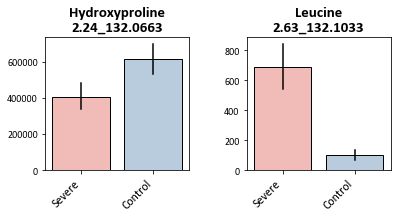

In [7]:
# dataset (pd.DataFrame)  : dataset containing metabolite intensity. The dataset should include Label column
# dict_group (dict)       : ID_groups:features # Key metabolties... (interesting features)
# dict_id (dict)          : features:ID # Get metabolties ID
# top_alpha               : hyperparameters of y-axis max value

# the number of graphs you can draw at one time is limited to 30... plt.subplot(5, 6, *)


get_group_figure(
    dataset=df,
    dict_group=dict_group,
    dict_id=dict_id,
    group='AA',
    order=['Severe', 'Control'],
    kind='barplot',
    top_alpha=1,
    is_save_file=False
)


AA


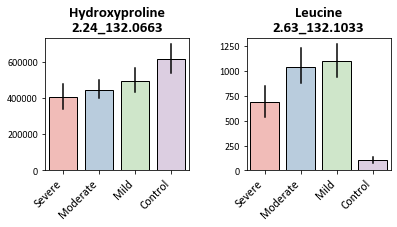

indole


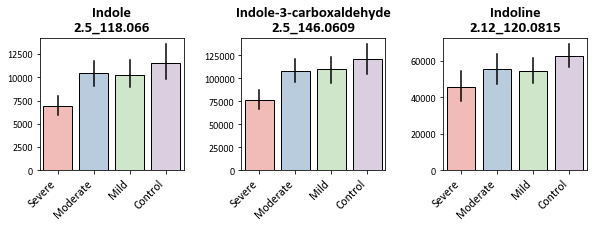

lysoPC


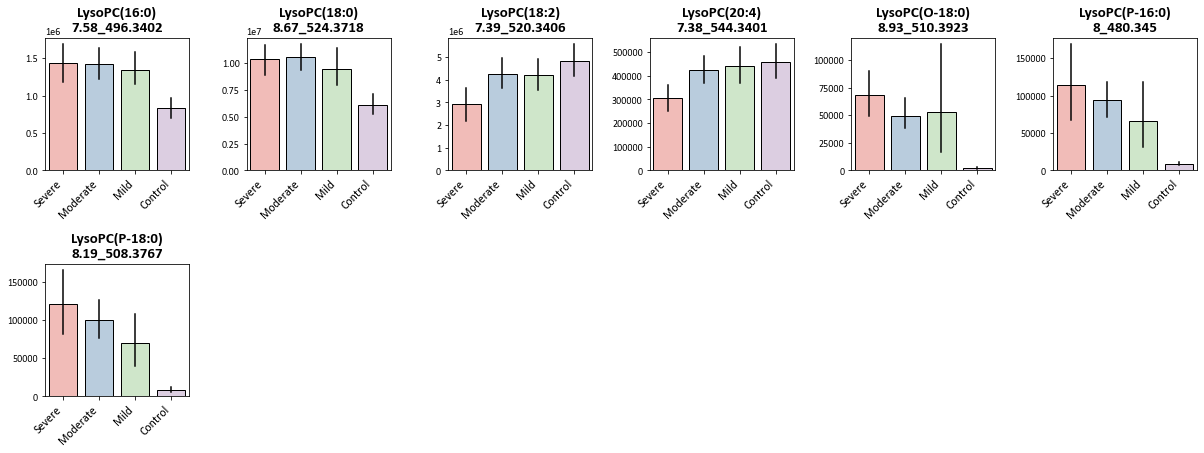

oxPC


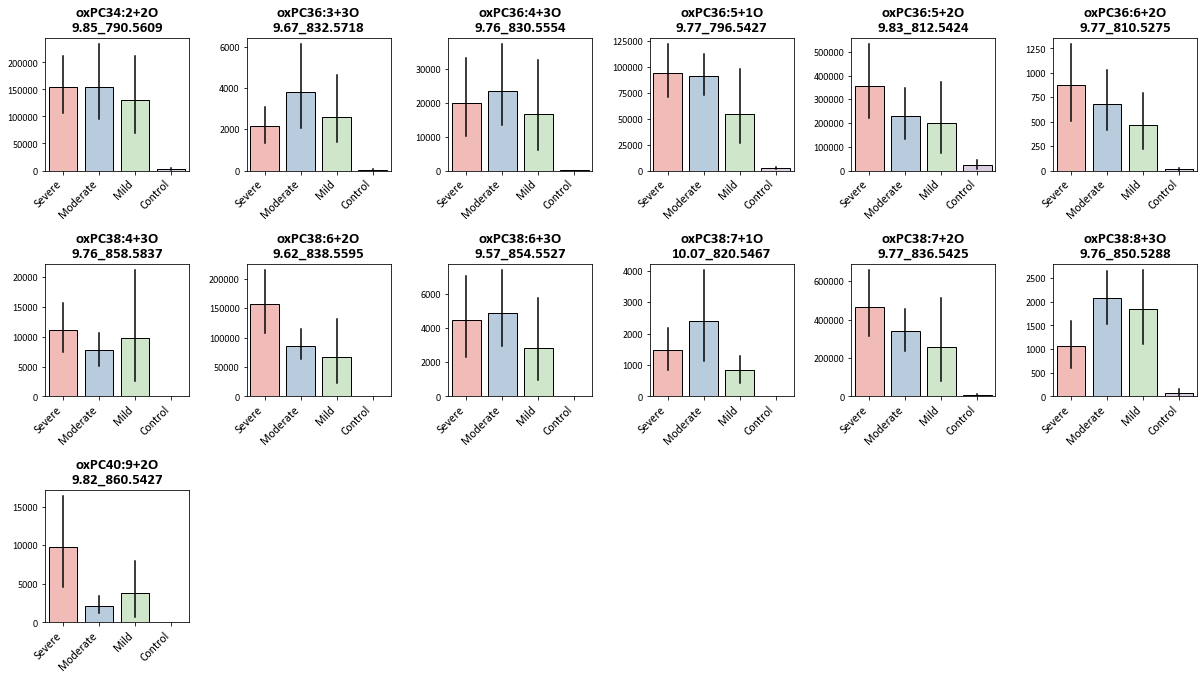

oxPE


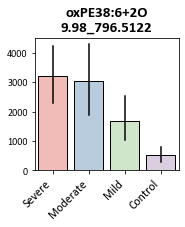

PC


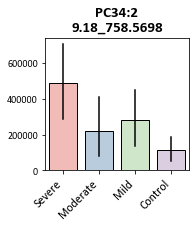

PUFA


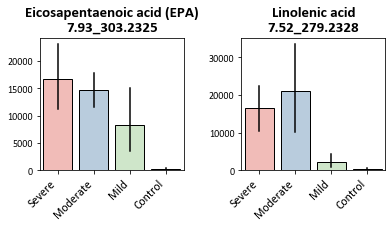

In [8]:
key_groups = list(df_id.ID_group.unique())

for group in key_groups:
    print(group)
    get_group_figure(df, dict_group, dict_id, group=group, order=['Severe', 'Moderate', 'Mild', 'Control'], kind='barplot')

AA


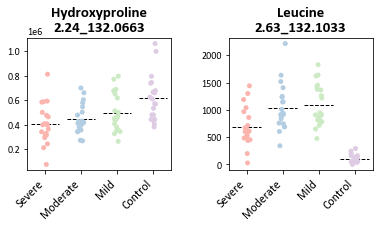

indole


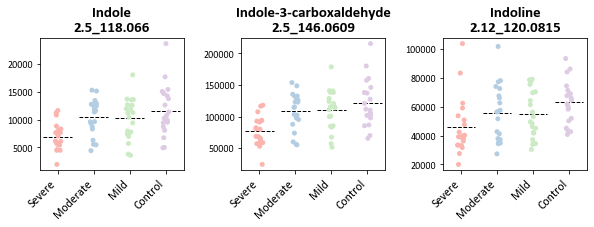

lysoPC


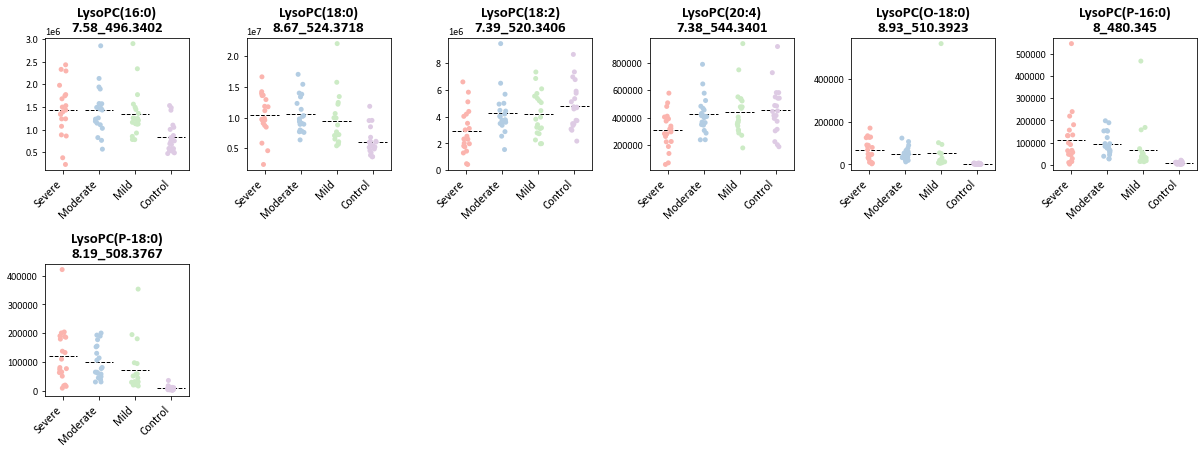

oxPC


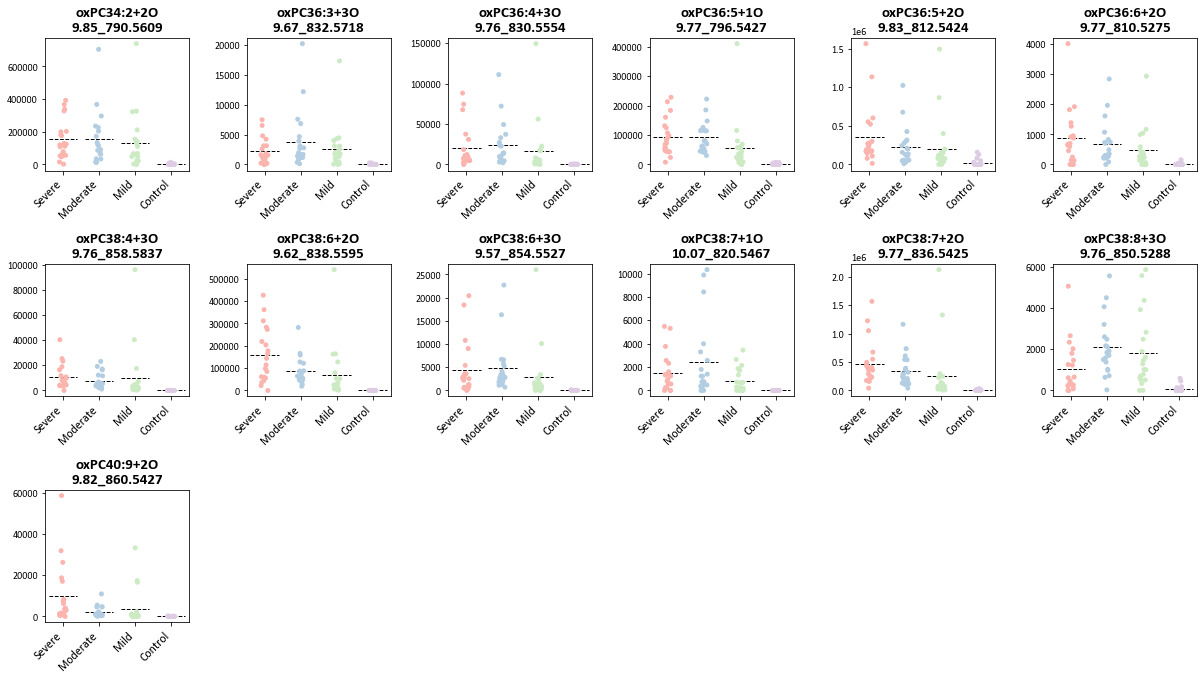

oxPE


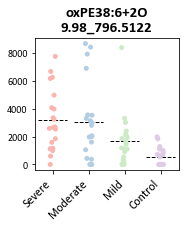

PC


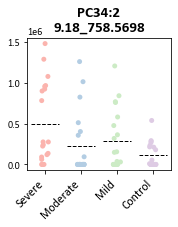

PUFA


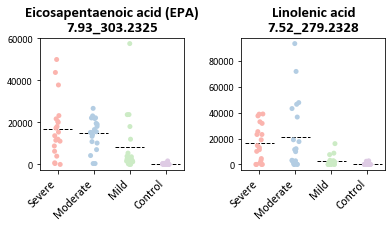

In [9]:
# kind option can change the figure type

for group in key_groups:
    print(group)
    get_group_figure(df, dict_group, dict_id, group=group, order=['Severe', 'Moderate', 'Mild', 'Control'], kind='stripplot')

AA


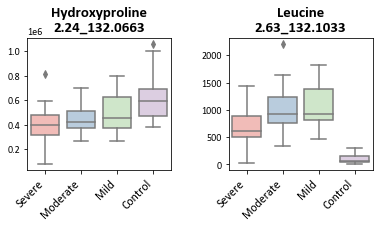

indole


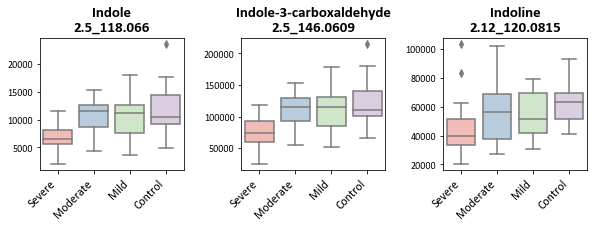

lysoPC


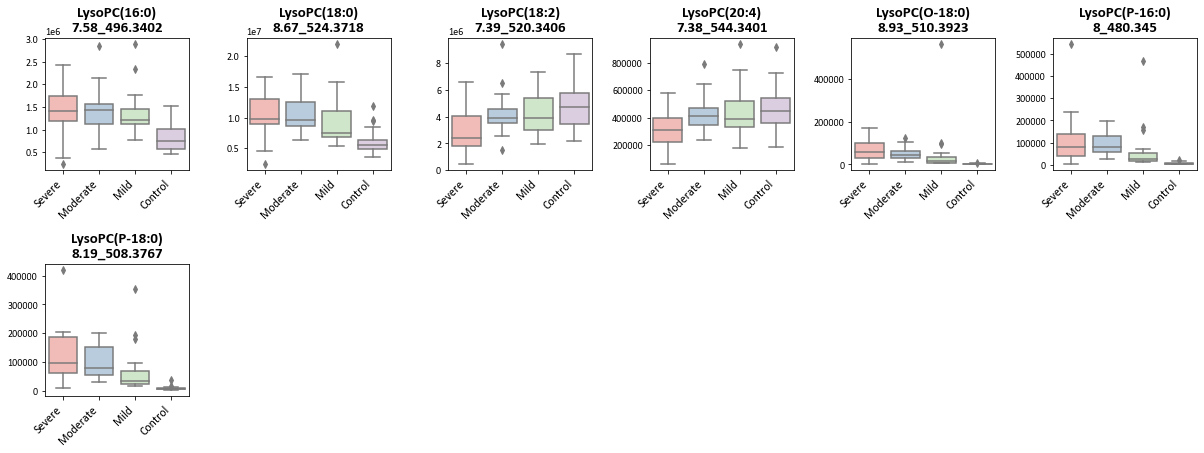

oxPC


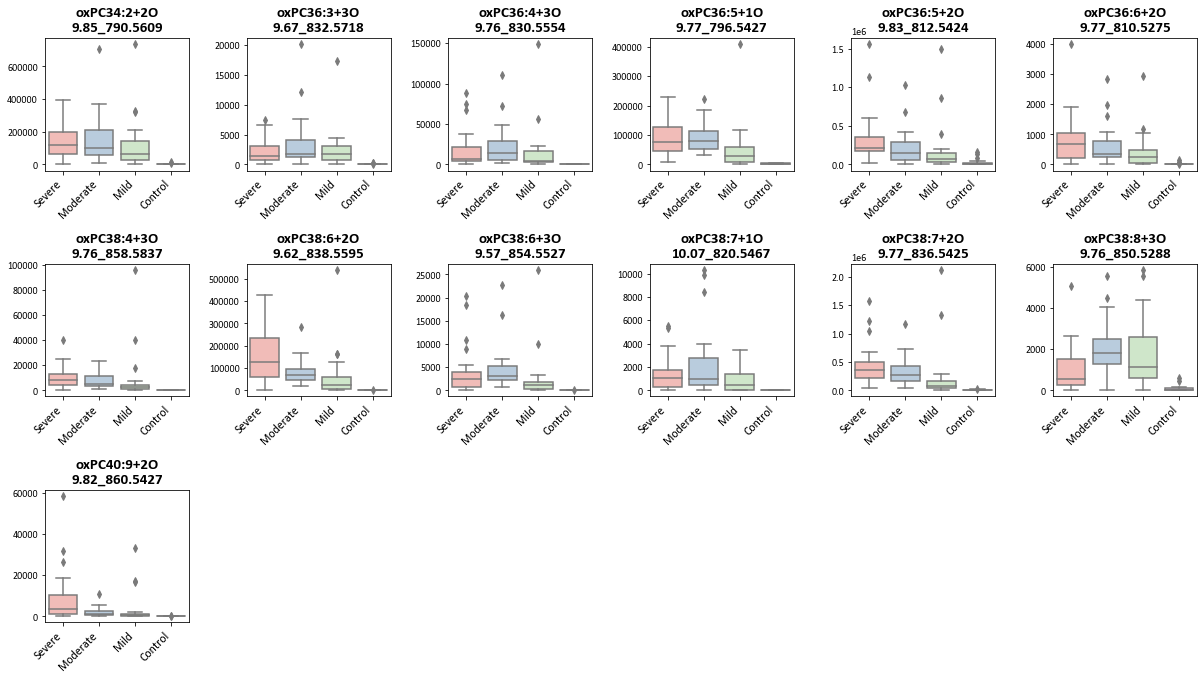

oxPE


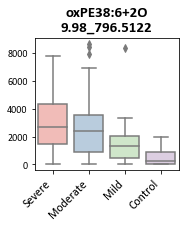

PC


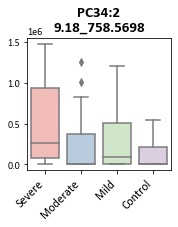

PUFA


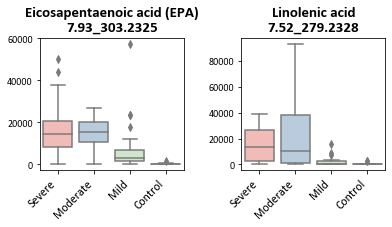

In [10]:
for group in key_groups:
    print(group)
    get_group_figure(df, dict_group, dict_id, group=group, order=['Severe', 'Moderate', 'Mild', 'Control'], kind='boxplot')